In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('ushape1.csv')

In [3]:
df.head()

,X,Y,class
0,2.115098,-0.046244,1.0
1,0.882490,-0.075756,0.0
2,-0.055144,-0.037332,1.0
3,0.829545,-0.539321,1.0
4,2.112857,0.662084,1.0


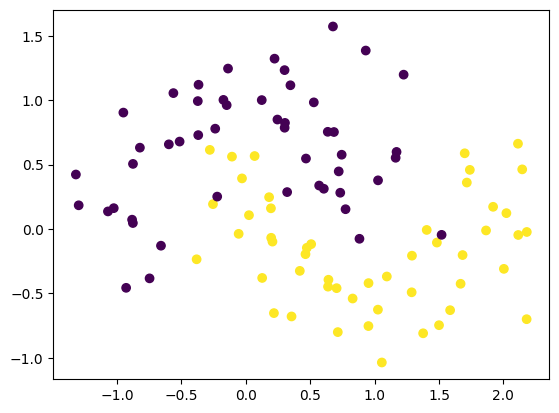

In [4]:
plt.scatter(df['X'],df['Y'],c=df['class'])

In [5]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [6]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [7]:
model = Sequential()

model.add(Dense(10,activation='relu',input_dim=2,kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(10,activation='relu',kernel_initializer='he_normal'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 371 (1.45 KB)
Trainable params: 371 (1.45 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
model.get_weights()

[array([[ 0.48291203, -0.04808283, -1.4954175 ,  0.05366877,  1.0413564 ,
          1.6822094 , -1.0591481 ,  0.19965968, -1.2263939 , -0.28465182],
        [-1.0731903 ,  1.3774434 , -1.1673769 ,  0.13796502,  0.3589081 ,
         -1.2621338 , -0.40692094, -0.76675034,  1.0093514 ,  1.4234105 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.26941   , -0.38457835, -0.57411164, -0.24972919,  0.37177306,
          0.47163373, -0.11250833, -0.23103453, -0.28563863, -0.8825349 ],
        [-0.43551686,  0.4679591 ,  0.3107288 , -0.4424887 ,  0.60480285,
          0.06006279, -0.23197906, -0.02972899,  0.48375833, -0.91764605],
        [ 0.40086702, -0.08382289,  0.2951527 , -0.27612782,  0.6015737 ,
         -0.4479712 ,  0.30974993, -0.98796844, -0.3045937 ,  0.03487087],
        [ 0.17299291,  0.6397882 , -0.11096381,  0.26431134, -0.75073504,
          0.27007842, -0.00179667, -0.37011707, -0.39802173, -0.6397082 ],
        [ 0.22883

In [9]:
initial_weights = model.get_weights()

In [10]:
initial_weights[0] = np.random.randn(2,10)*np.sqrt(1/2)
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[5] = np.zeros(model.get_weights()[5].shape)
initial_weights[6] = np.random.randn(10,10)*np.sqrt(1/10)
initial_weights[7] = np.zeros(model.get_weights()[7].shape)
initial_weights[8] = np.random.randn(10,1)*np.sqrt(1/10)
initial_weights[9] = np.zeros(model.get_weights()[9].shape)

In [11]:
model.set_weights(initial_weights)

In [12]:
model.get_weights()

[array([[-0.9463239 ,  0.5583198 ,  1.3289452 , -0.2042661 , -1.1264064 ,
          0.10187341, -0.8876205 ,  1.1330867 , -0.45859888,  0.9228199 ],
        [ 0.3454118 , -0.13651061,  0.58232147, -0.6114341 ,  0.6534295 ,
         -0.56473476, -0.4353076 , -0.8131966 , -0.33955732, -1.3822498 ]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 6.9559783e-01,  2.0216255e-01, -3.4804189e-01, -6.9820426e-02,
         -5.2592736e-01, -3.5779732e-01, -7.2194628e-02, -1.5586972e-01,
          3.0784698e-02, -1.0481003e-01],
        [-3.1840867e-01, -2.7061563e-02,  1.1764055e-02, -3.2833673e-02,
          4.1968986e-01, -1.7323375e-01,  4.6771642e-02,  1.6498013e-01,
         -2.6115650e-01,  1.0188340e+00],
        [-5.9128445e-02, -2.4399131e-03, -1.9726531e-01, -3.8681972e-01,
          5.3505981e-01,  1.7107147e-01, -3.0336013e-01, -7.8216398e-01,
          4.8186499e-01, -2.6515558e-01],
        [-2.4009223e-01,  4.3233857e-01,  4.90908

In [13]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
history = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
3/3 [==============================] - 2s 156ms/step - loss: 0.6960 - accuracy: 0.5063 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
3/3 [==============================] - 0s 37ms/step - loss: 0.6942 - accuracy: 0.5443 - val_loss: 0.6908 - val_accuracy: 0.5000
Epoch 3/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6923 - accuracy: 0.5696 - val_loss: 0.6885 - val_accuracy: 0.5500
Epoch 4/100
3/3 [==============================] - 0s 28ms/step - loss: 0.6907 - accuracy: 0.5949 - val_loss: 0.6861 - val_accuracy: 0.6000
Epoch 5/100
3/3 [==============================] - 0s 27ms/step - loss: 0.6891 - accuracy: 0.6329 - val_loss: 0.6835 - val_accuracy: 0.6000
Epoch 6/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6873 - accuracy: 0.6709 - val_loss: 0.6808 - val_accuracy: 0.7000
Epoch 7/100
3/3 [==============================] - 0s 36ms/step - loss: 0.6848 - accuracy: 0.7089 - val_loss: 0.6779 - val_accuracy: 0.7500
Epoch 8/100
3/3 [==

In [15]:
model.get_weights()

[array([[-1.1750857 ,  0.72047126,  1.430053  , -0.48470065, -1.2975633 ,
          0.3017384 , -0.8035362 ,  1.041529  , -0.21962559,  0.99842554],
        [ 0.44590506, -0.42850617,  0.82062536, -0.40413362,  0.86871   ,
         -0.7974808 , -0.5929704 , -0.9395888 , -0.53756684, -1.5069815 ]],
       dtype=float32),
 array([-0.06554205,  0.03493204,  0.20447291, -0.04545612,  0.00138218,
         0.20148899, -0.09222641, -0.24307671,  0.26837993,  0.05705548],
       dtype=float32),
 array([[ 0.8925658 ,  0.44372216, -0.3480419 , -0.06982043, -0.526762  ,
         -0.19443946, -0.07782728, -0.09432892,  0.24607617, -0.06784812],
        [-0.3732257 ,  0.10491147,  0.01176406, -0.03283367,  0.663405  ,
         -0.13608381,  0.04677164,  0.16498013, -0.3439177 ,  1.2136475 ],
        [-0.20763999,  0.25771385, -0.19726531, -0.38681972,  0.6927859 ,
          0.36514145, -0.37196335, -0.76479274,  0.53641665, -0.22234954],
        [-0.12377941,  0.60474604,  0.49090827, -0.01190603, 

9600/9600 [==============================] - 14s 1ms/step


<Axes: >

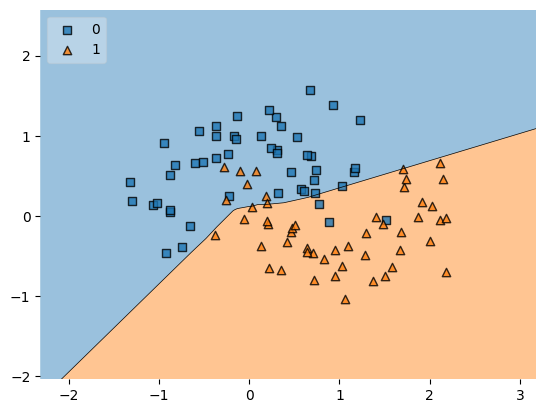

In [16]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)